In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

## Histogram of data

In [8]:
! wc -l /home/daniil/Desktop/bioinformatics_group/TRIADS_2023/TRIADS/*[C2].bed | awk -F' ' '{print $2"\t"$1}' > real_data.tsv

In [9]:
real = pd.read_csv("real_data.tsv", sep='\t', header=None).rename(columns={0:"fname", 1:"triad_count"}).iloc[:-1, :]
real["fname"] = real["fname"].apply(lambda x: x.split('/')[-1])

In [10]:
l = []
for el in real.fname.values:
    el = el.split('.')
    prot, org = el[0], el[4]
    l.append(f"{prot}_{org}")
real["Prot"] = l
real = real.loc[:, ["Prot", "triad_count"]]

(array([26.,  6.,  1.,  2.,  2.,  0.,  2.,  1.,  3.,  1.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,
         1.]),
 array([4.00000e+00, 3.93400e+02, 7.82800e+02, 1.17220e+03, 1.56160e+03,
        1.95100e+03, 2.34040e+03, 2.72980e+03, 3.11920e+03, 3.50860e+03,
        3.89800e+03, 4.28740e+03, 4.67680e+03, 5.06620e+03, 5.45560e+03,
        5.84500e+03, 6.23440e+03, 6.62380e+03, 7.01320e+03, 7.40260e+03,
        7.79200e+03, 8.18140e+03, 8.57080e+03, 8.96020e+03, 9.34960e+03,
        9.73900e+03, 1.01284e+04, 1.05178e+04, 1.09072e+04, 1.12966e+04,
        1.16860e+04, 1.20754e+04, 1.24648e+04, 1.28542e+04, 1.32436e+04,
        1.36330e+04, 1.40224e+04, 1.44118e+04, 1.48012e+04, 1.51906e+04,
        1.55800e+04]),
 <BarContainer object of 40 artists>)

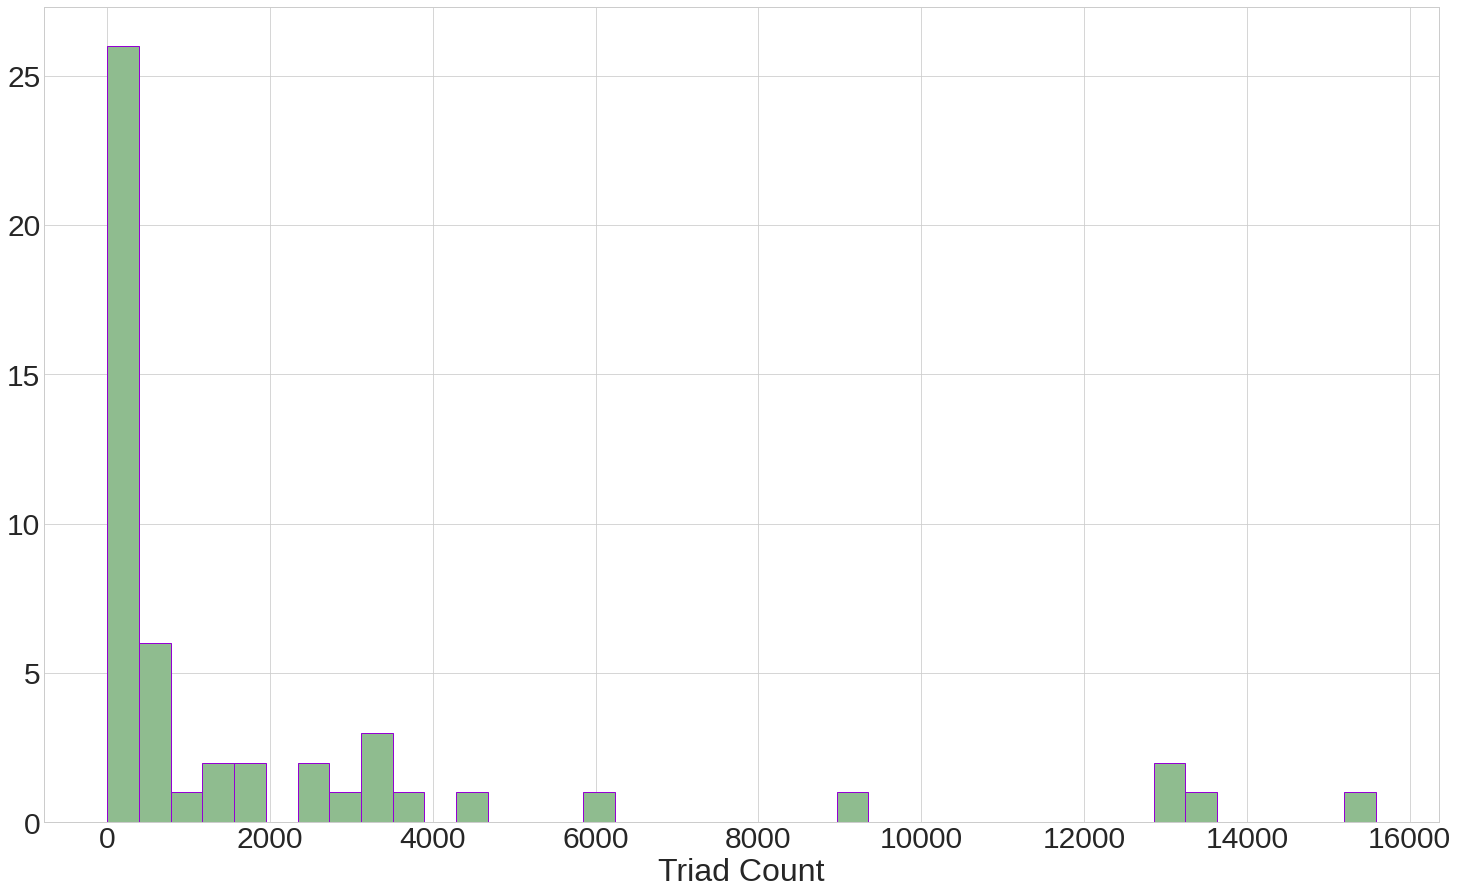

In [11]:
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(25,15))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Triad Count", fontsize=32)
#kde = gaussian_kde(real["triad_count"])
#xx = np.linspace(0, 16000, 10_000)

plt.hist(real["triad_count"], color = "darkseagreen", ec="darkviolet", bins=40)
#plt.plot(xx, kde(xx))

## PDFs

In [2]:
l = []
for i, file in enumerate(glob.glob("sim*tsv")):
    df = pd.read_csv(file, sep='\t', header=None).rename(columns={0:"itr", 1:"Prot", 2:"triad_count"})
    df["itr"] = df["itr"] + 20*i
    l.append(df)

ParserError: Error tokenizing data. C error: Expected 15 fields in line 2, saw 16


In [13]:
simulation_table_pivoted = pd.concat(l).pivot(index="Prot", columns="itr", values="triad_count")
simulation_table = pd.concat(l)

NameError: name 'real' is not defined

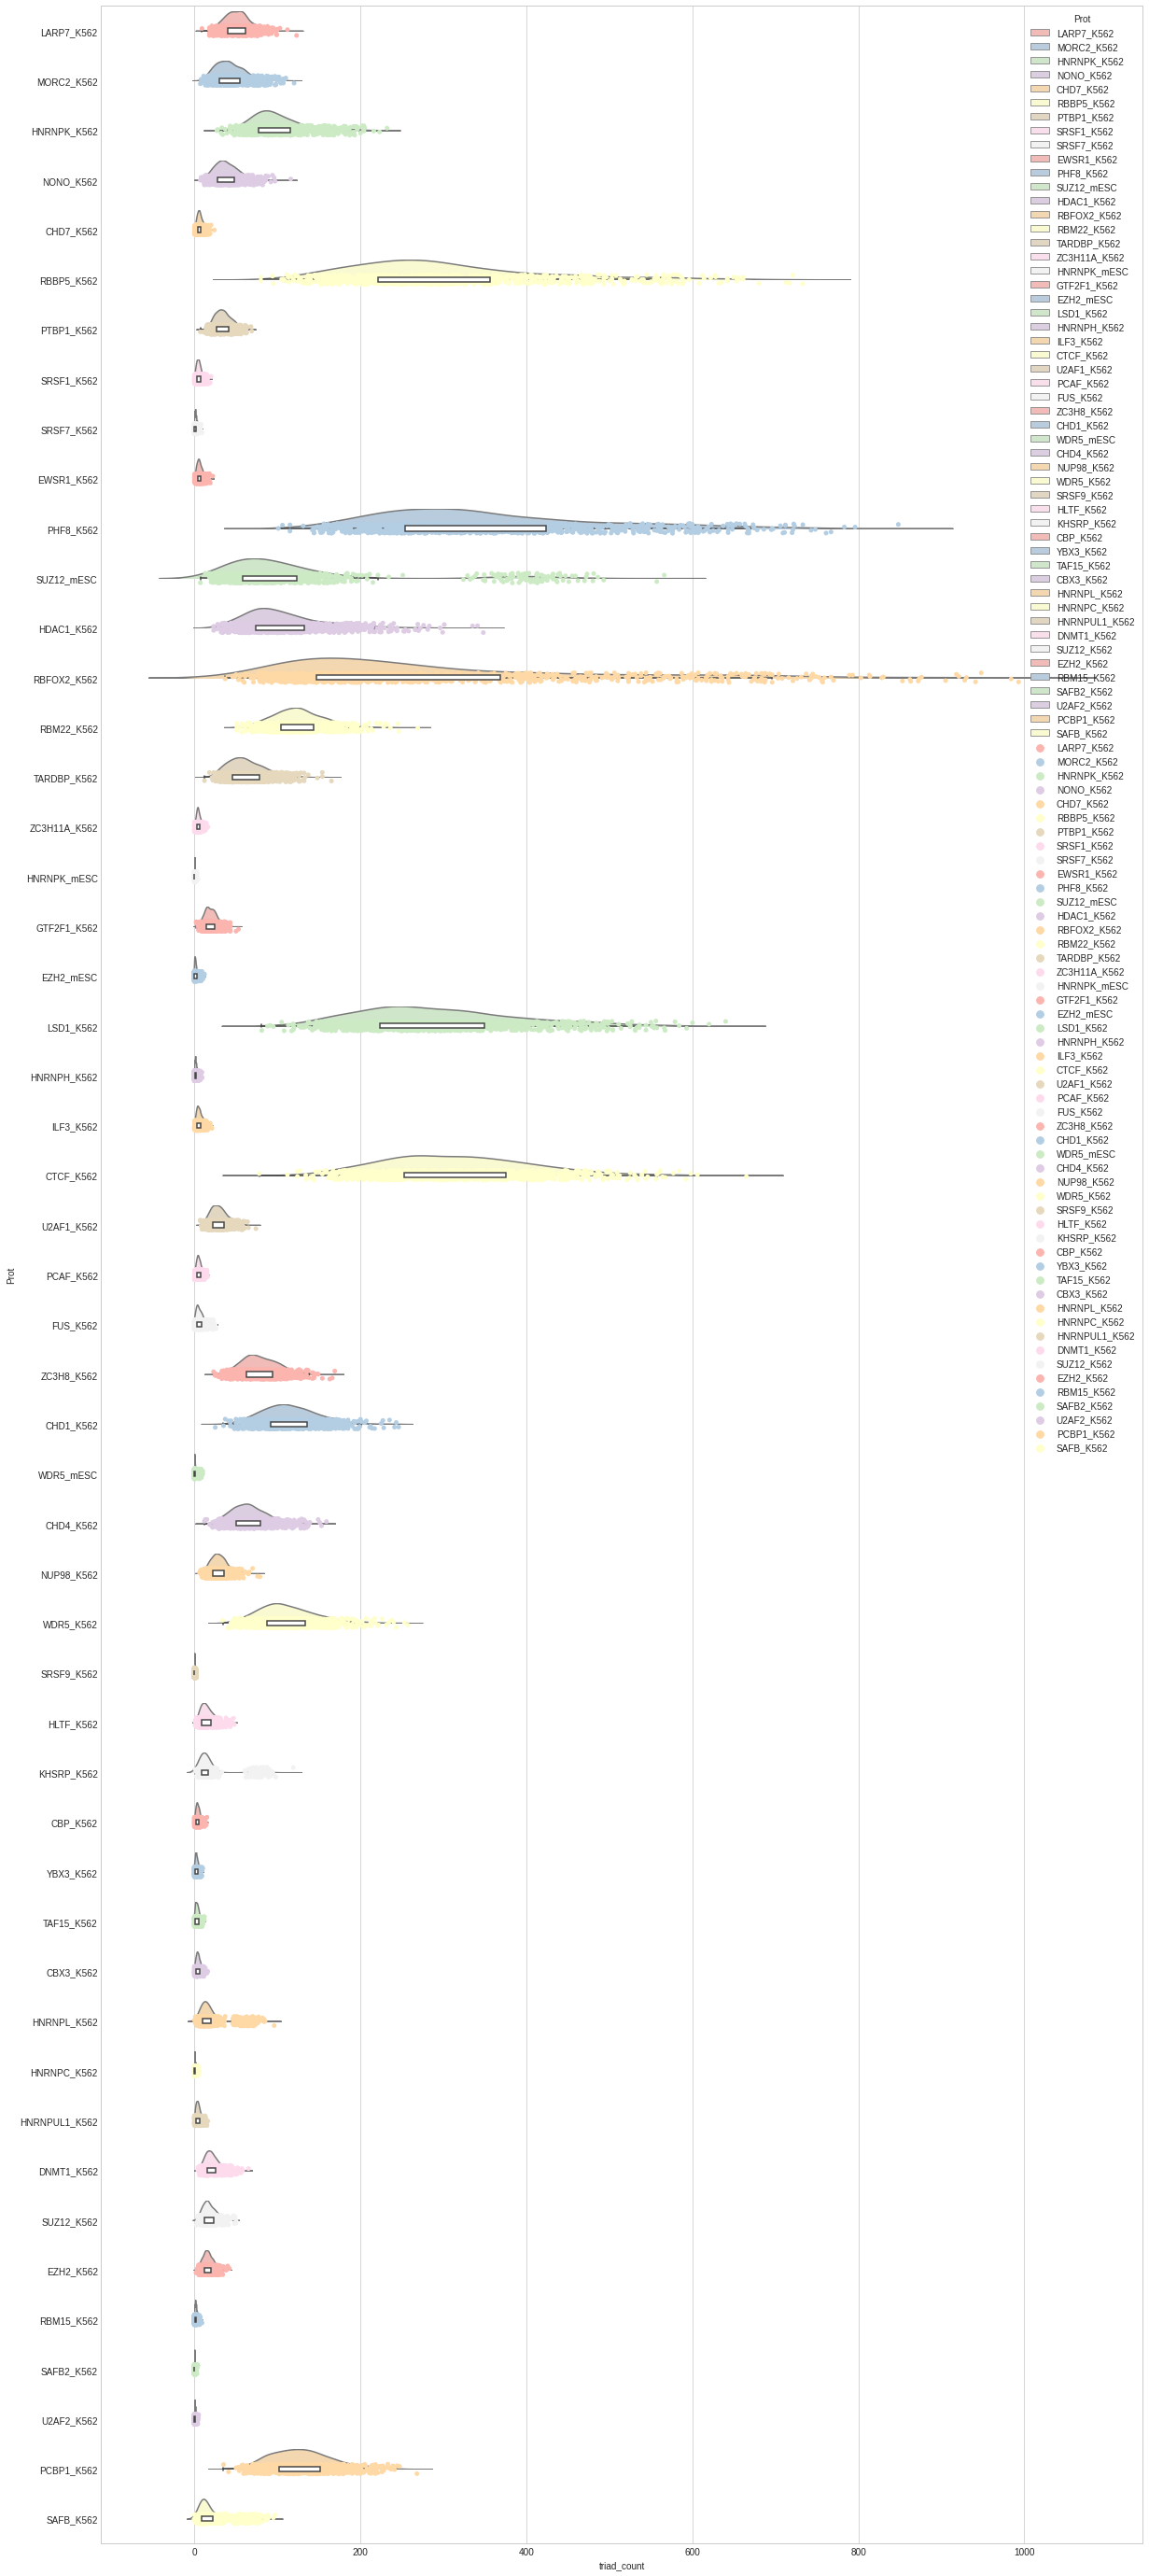

In [6]:
sns.set_style('white')
palette = 'Pastel1'
plt.figure(figsize=(20,50))
plt.style.use("seaborn-whitegrid")
ax = sns.violinplot(y="Prot", x="triad_count", data=simulation_table, hue="Prot", dodge=False,
                    palette=palette,
                    scale="width", inner=None)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
for violin in ax.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width, height / 2, transform=ax.transData))

ax.set_alpha(0.6)
sns.boxplot(y="Prot", x="triad_count", data=simulation_table, saturation=1, showfliers=False,
            width=0.1, boxprops={'zorder': 4, 'facecolor': 'white'}, ax=ax)
old_len_collections = len(ax.collections)
sns.stripplot(y="Prot", x="triad_count", data=simulation_table, hue="Prot", palette=palette, dodge=False, ax=ax)
for dots in ax.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0.12, 0]))
ypos = {c.get_text(): y for c, y in zip(ax.get_yticklabels(), ax.get_yticks())}

# plot the threshold lines
thresholds = real.set_index("Prot").to_dict()["triad_count"]
thresholds["WDR5_mESC"] = 0
for cat in df.Prot:
    ax.plot(
        [thresholds[cat], thresholds[cat]],
        [ypos[cat] - 0.1, ypos[cat] + 0.1],
        color="red",
        lw=4,
    )
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.legend_.remove()
plt.ylabel("")
plt.xlabel('Triad Count', fontsize=26)
plt.show()

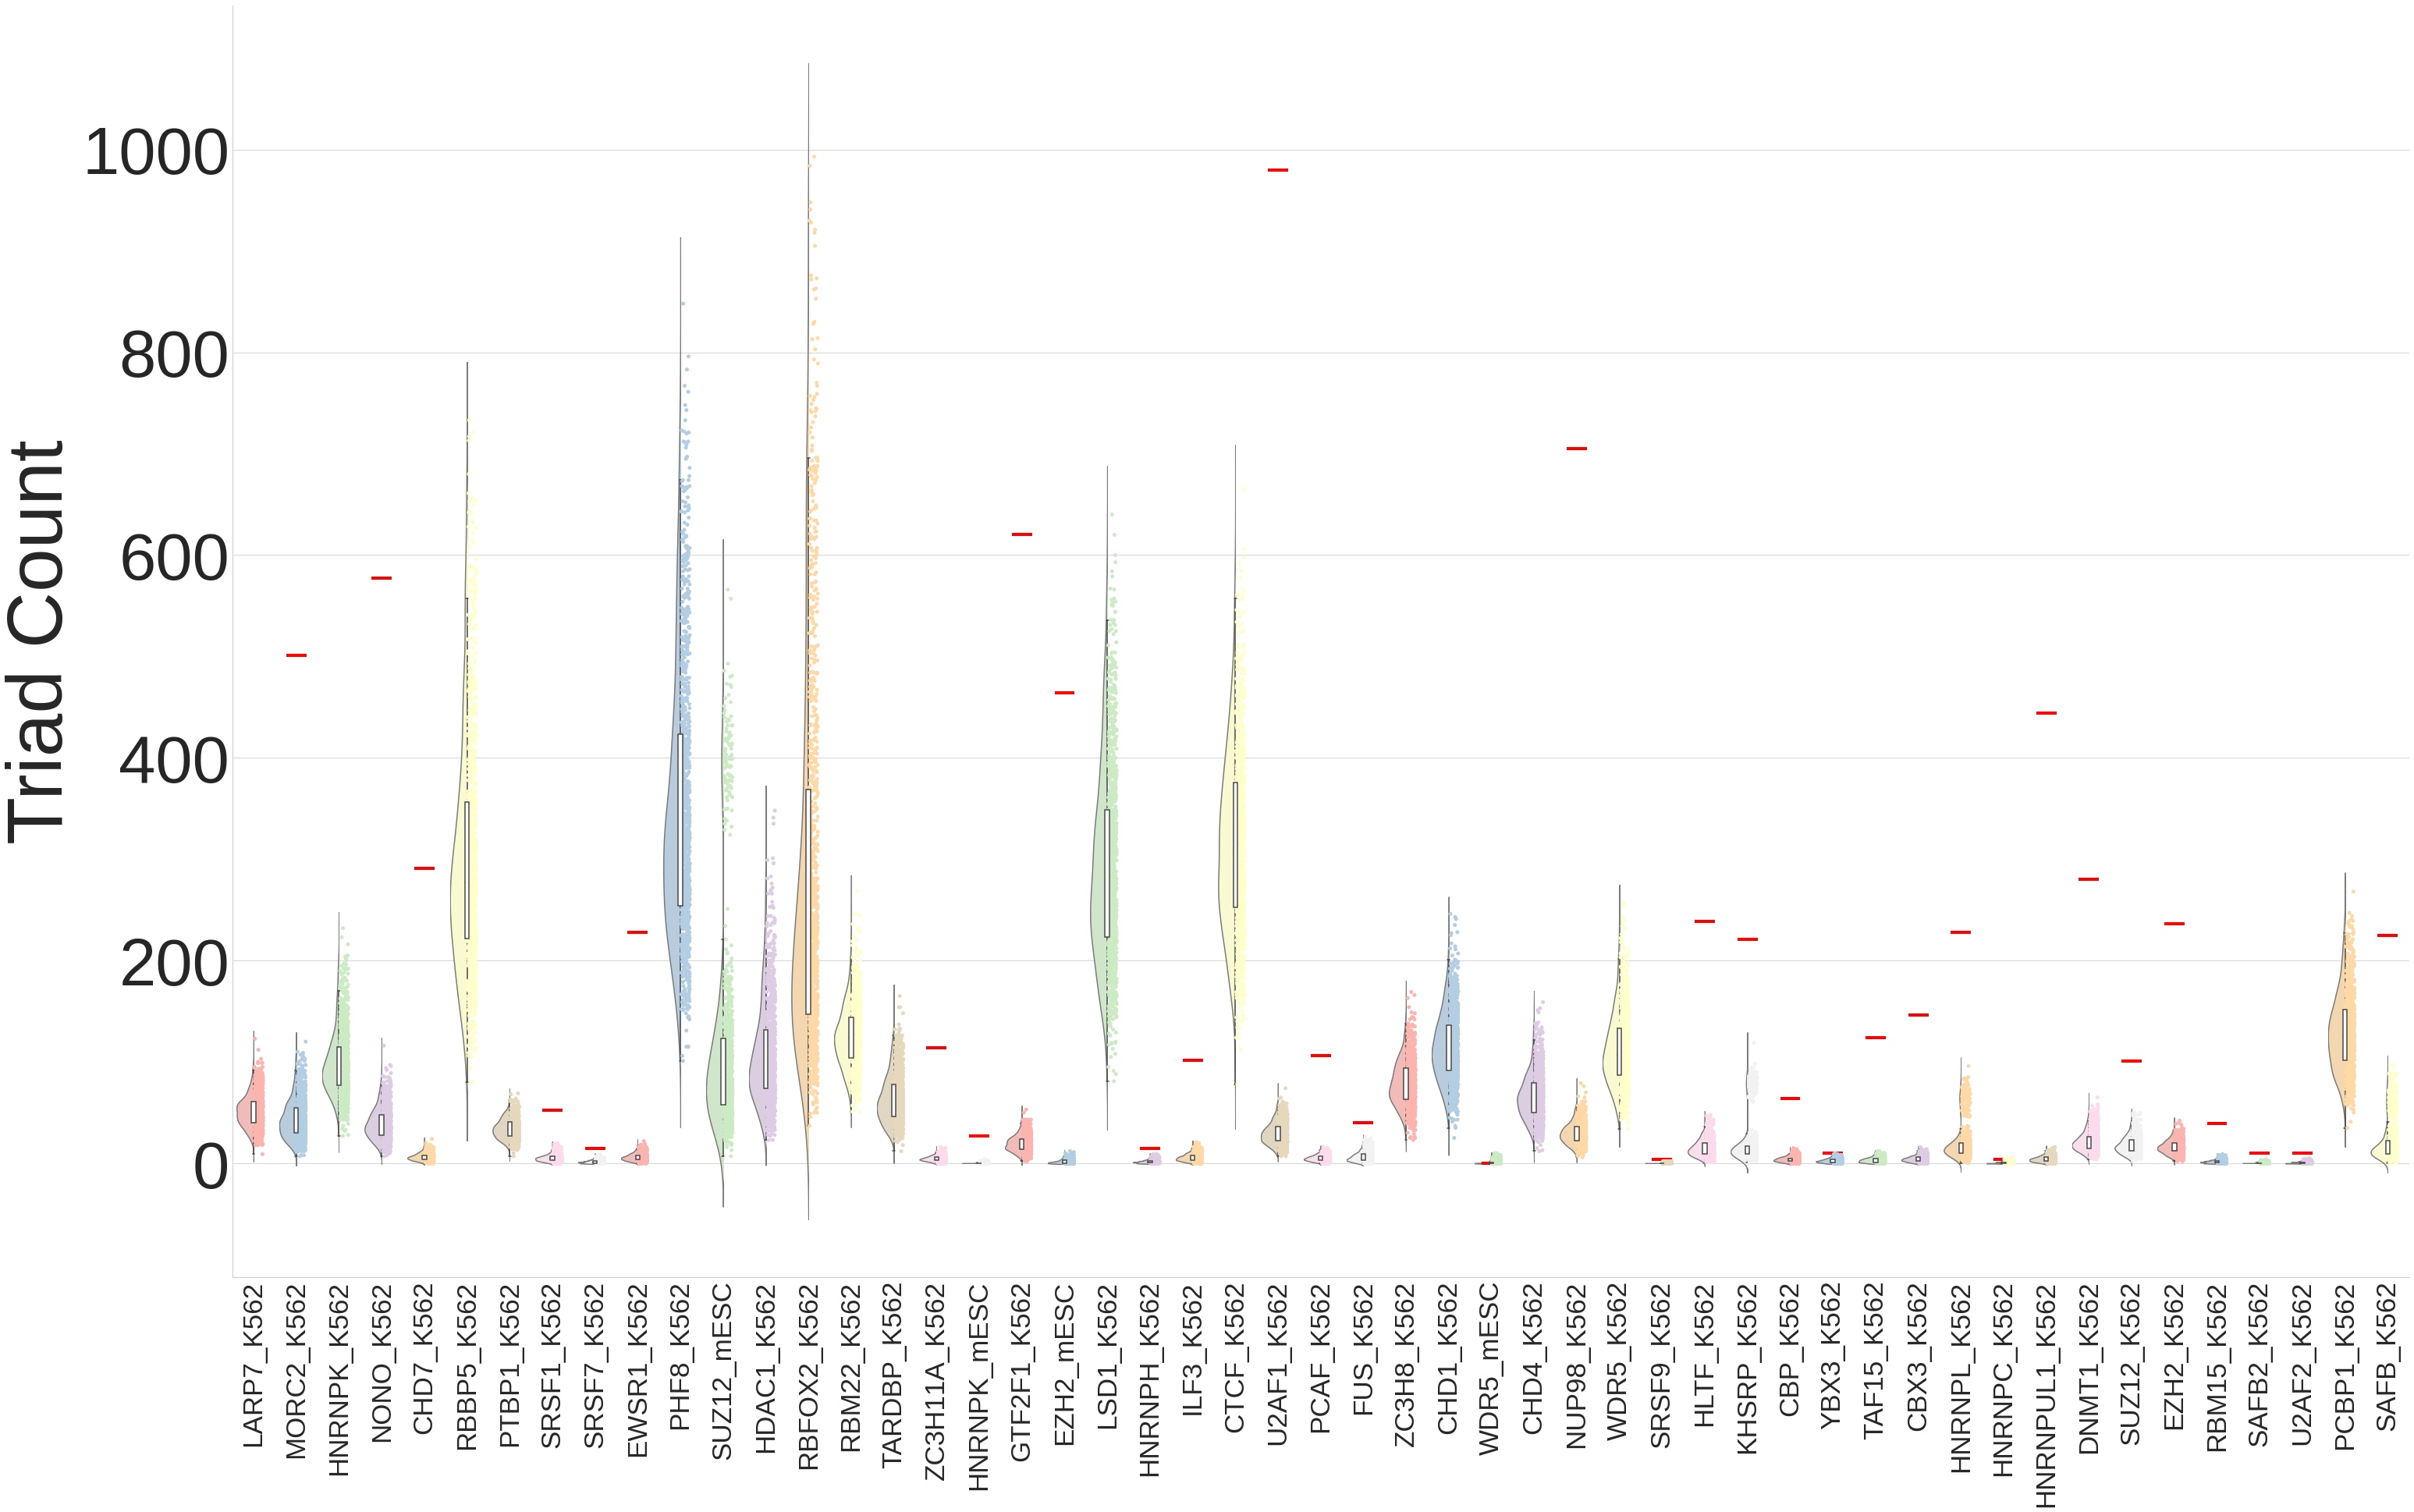

In [18]:
sns.set_style('white')
palette = 'Pastel1'
plt.figure(figsize=(50,30))
plt.style.use("seaborn-whitegrid")
ax = sns.violinplot(y="triad_count", x="Prot", data=simulation_table, hue="Prot", dodge=False,
                    palette=palette,
                    scale="width", inner=None)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
for violin in ax.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width / 2, height, transform=ax.transData))

ax.set_alpha(0.6)
sns.boxplot(y="triad_count", x="Prot", data=simulation_table, saturation=1, showfliers=False,
            width=0.1, boxprops={'zorder': 4, 'facecolor': 'white'}, ax=ax)
old_len_collections = len(ax.collections)
sns.stripplot(y="triad_count", x="Prot", data=simulation_table, hue="Prot", palette=palette, dodge=False, ax=ax)
for dots in ax.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0.12, 0]))
ypos = {c.get_text(): y for c, y in zip(ax.get_xticklabels(), ax.get_xticks())}

# plot the threshold lines
thresholds = real.set_index("Prot").to_dict()["triad_count"]
thresholds["WDR5_mESC"] = 0
for cat in df.Prot:
    ax.plot(
        [ypos[cat] - 0.2, ypos[cat] + 0.2],
        [thresholds[cat], thresholds[cat]],
        color="red",
        lw=4,
    )
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.tick_params(axis='both', which='major', labelsize=85)
ax.tick_params(axis="x", rotation = 90, labelsize=35)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend_.remove()
plt.xlabel("")
plt.ylabel('Triad Count', fontsize=100)
plt.show()

In [9]:
# frequentism
for PROT in real.Prot:
    statistic = real[real["Prot"] == PROT].loc[:,"triad_count"].values[0]
    distribution = simulation_table_pivoted[simulation_table_pivoted.index == PROT].values
    print(PROT, (distribution > statistic).sum() / (distribution.sum()))

CBP_K562 0.0
CBX3_K562 0.0
CHD1_K562 0.0
CHD4_K562 0.0
CHD7_K562 0.0
CTCF_K562 0.0
DNMT1_K562 0.0
EWSR1_K562 0.0
EZH2_mESC 0.0
EZH2_K562 0.0
FUS_K562 0.0
GTF2F1_K562 0.0
HDAC1_K562 0.0
HLTF_K562 0.0
HNRNPC_K562 0.009549795361527967
HNRNPH_K562 0.0
HNRNPK_mESC 0.0
HNRNPK_K562 0.0
HNRNPL_K562 0.0
HNRNPUL1_K562 0.0
ILF3_K562 0.0
KHSRP_K562 0.0
LARP7_K562 0.0
LSD1_K562 0.0
MORC2_K562 0.0
NONO_K562 0.0
NUP98_K562 0.0
PCAF_K562 0.0
PCBP1_K562 0.0
PHF8_K562 0.0
PTBP1_K562 0.0
RBBP5_K562 0.0
RBFOX2_K562 0.0
RBM15_K562 0.0
RBM22_K562 0.0
SAFB2_K562 0.0
SAFB_K562 0.0
SRSF1_K562 0.0
SRSF7_K562 0.0
SRSF9_K562 0.0
SUZ12_mESC 0.0
SUZ12_mESC 0.0
SUZ12_K562 0.0
TAF15_K562 0.0
TARDBP_K562 0.0
U2AF1_K562 0.0
U2AF2_K562 0.0
WDR5_K562 0.0
YBX3_K562 0.0
ZC3H11A_K562 0.0
ZC3H8_K562 0.0


In [10]:
from scipy import stats
from scipy.stats import gamma

l = []
gammas = []
for PROT in real.Prot:
    statistic = real[real["Prot"] == PROT].loc[:,"triad_count"].values[0]
    distribution = simulation_table_pivoted[simulation_table_pivoted.index == PROT].values[0]
    fit_alpha, fit_loc, fit_beta = stats.gamma.fit(distribution)
    pval = gamma.pdf(statistic, a=fit_alpha, scale=fit_beta, loc=fit_loc)
    gammas.append([fit_alpha, fit_loc, fit_beta])
    print(PROT, statistic, pval)
    l.append(gamma.pdf(statistic, a=fit_alpha, scale=fit_beta, loc=fit_loc))

CBP_K562 64 1.8519737623049606e-21
CBX3_K562 146 1.4881314234532977e-45
CHD1_K562 3683 7.046341113821652e-162
CHD4_K562 1273 1.0214484239255975e-66
CHD7_K562 291 8.154796314933809e-73
CTCF_K562 9215 1.9872581342097908e-153
DNMT1_K562 280 3.3021907593400256e-23
EWSR1_K562 228 1.3122343696362902e-54
EZH2_mESC 464 7.768248295895036e-119
EZH2_K562 236 3.0273841252104614e-40
FUS_K562 40 2.9442388839607767e-05
GTF2F1_K562 620 5.259112458606142e-92
HDAC1_K562 2522 2.7737531836856695e-38
HLTF_K562 239 3.3285382003716124e-23
HNRNPC_K562 4 0.00038735031948663166
HNRNPH_K562 15 1.0874766354936707e-05
HNRNPK_mESC 27 1.6035192434577898e-14
HNRNPK_K562 1773 4.067744048167312e-56
HNRNPL_K562 228 8.276248213509766e-11
HNRNPUL1_K562 444 7.593573067792594e-122
ILF3_K562 102 2.187629849402589e-22
KHSRP_K562 221 5.0652013216080295e-09
LARP7_K562 1459 2.394162154508902e-143
LSD1_K562 6143 2.7027580465537526e-64
MORC2_K562 501 9.013897841757792e-21
NONO_K562 577 4.773132678166647e-34
NUP98_K562 705 1.961377

In [17]:
from scipy.stats import hmean as HMP

HMP(np.array(l)[np.array(l) != 0])

1.1682367985102083e-264

In [57]:
pd.DataFrame(zip(real.Prot, np.array(l))).set_index(0).iloc[:,0].apply(lambda x: -np.log10(x)).

0
CBP_K562          20.732365
CBX3_K562         44.827359
CHD1_K562        161.152036
CHD4_K562         65.990784
CHD7_K562         72.088587
CTCF_K562        152.701746
DNMT1_K562        22.481198
EWSR1_K562        53.881989
EZH2_mESC        118.109677
EZH2_K562         39.518932
FUS_K562           4.531027
GTF2F1_K562       91.279088
HDAC1_K562        37.556932
HLTF_K562         22.477746
HNRNPC_K562        3.411896
HNRNPH_K562        4.963580
HNRNPK_mESC       13.794926
HNRNPK_K562       55.390646
HNRNPL_K562       10.082166
HNRNPUL1_K562    121.119554
ILF3_K562         21.660026
KHSRP_K562         8.295403
LARP7_K562       142.620846
LSD1_K562         63.568193
MORC2_K562        20.045087
NONO_K562         33.321196
NUP98_K562        77.707439
PCAF_K562         31.104098
PCBP1_K562       103.502595
PHF8_K562         81.161366
PTBP1_K562       265.622665
RBBP5_K562        97.130658
RBFOX2_K562       11.791320
RBM15_K562        13.363056
RBM22_K562       223.361703
SAFB2_K562        

In [29]:
fishr = np.array(l)
fishr = fishr[~ np.isnan(fishr)]
stats.combine_pvalues(fishr[fishr != 0])

(4914.922150724208, 0.0)

In [40]:
fishr = np.array(l)
fishr = fishr[~ np.isnan(fishr)]
stats.hmean(fishr[fishr != 0])

1.7059046540996553e-287

### by simulation

In [34]:
operator = np.median
distribution = simulation_table_pivoted.aggregate(operator, axis=0) #bg dist of statistic

fit_alpha, fit_loc, fit_beta = stats.gamma.fit(distribution)
statistic = real.triad_count.values.mean()

gamma.pdf(statistic, a=fit_alpha, scale=fit_loc, loc=fit_beta)

3.772509440273002e-286

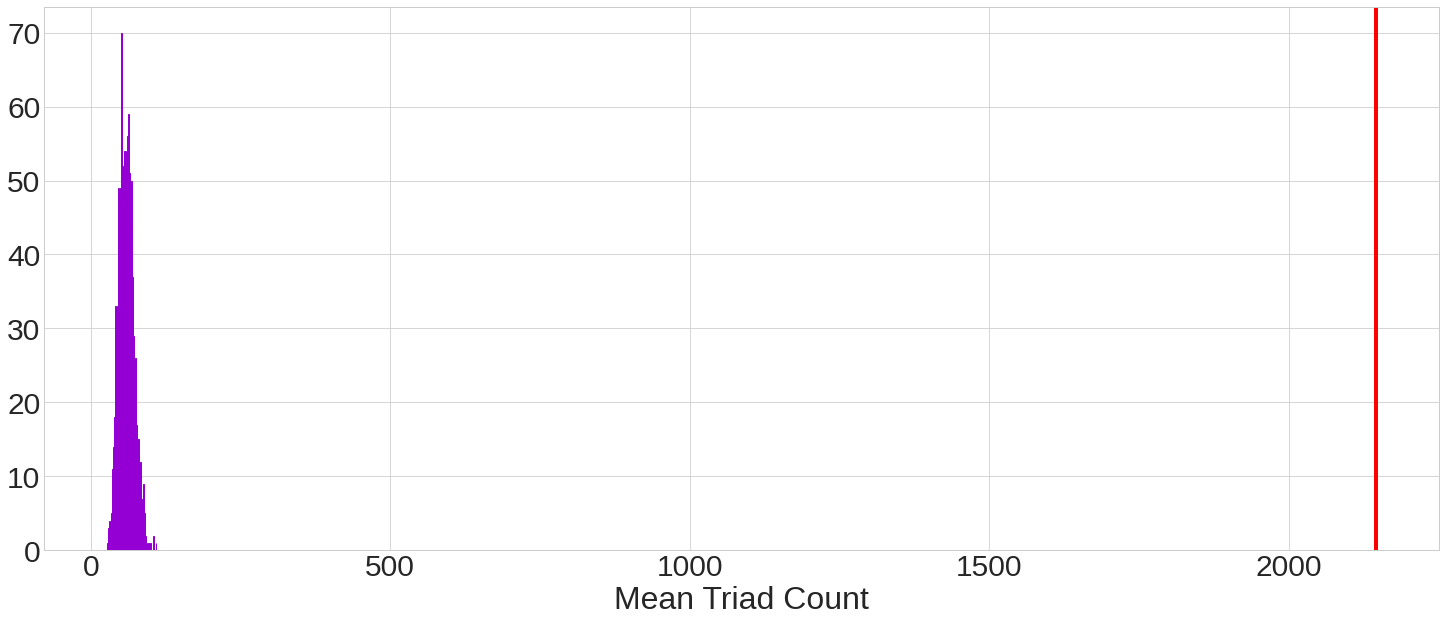

In [172]:
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(25,10))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Mean Triad Count", fontsize=32)
#kde = gaussian_kde(real["triad_count"])
#xx = np.linspace(0, 16000, 10_000)

plt.hist(distribution, color = "darkseagreen", ec="darkviolet", bins=50)
plt.axvline(x = statistic, ymin=0, ymax=10, linewidth=4, color="red")
#plt.plot(xx, kde(xx))

In [173]:
operator = np.median
distribution = simulation_table_pivoted.aggregate(operator, axis=0) #bg dist of statistic

statistic = np.median(real.triad_count.values)


print((distribution > statistic).sum() / (distribution.sum()))

0.0


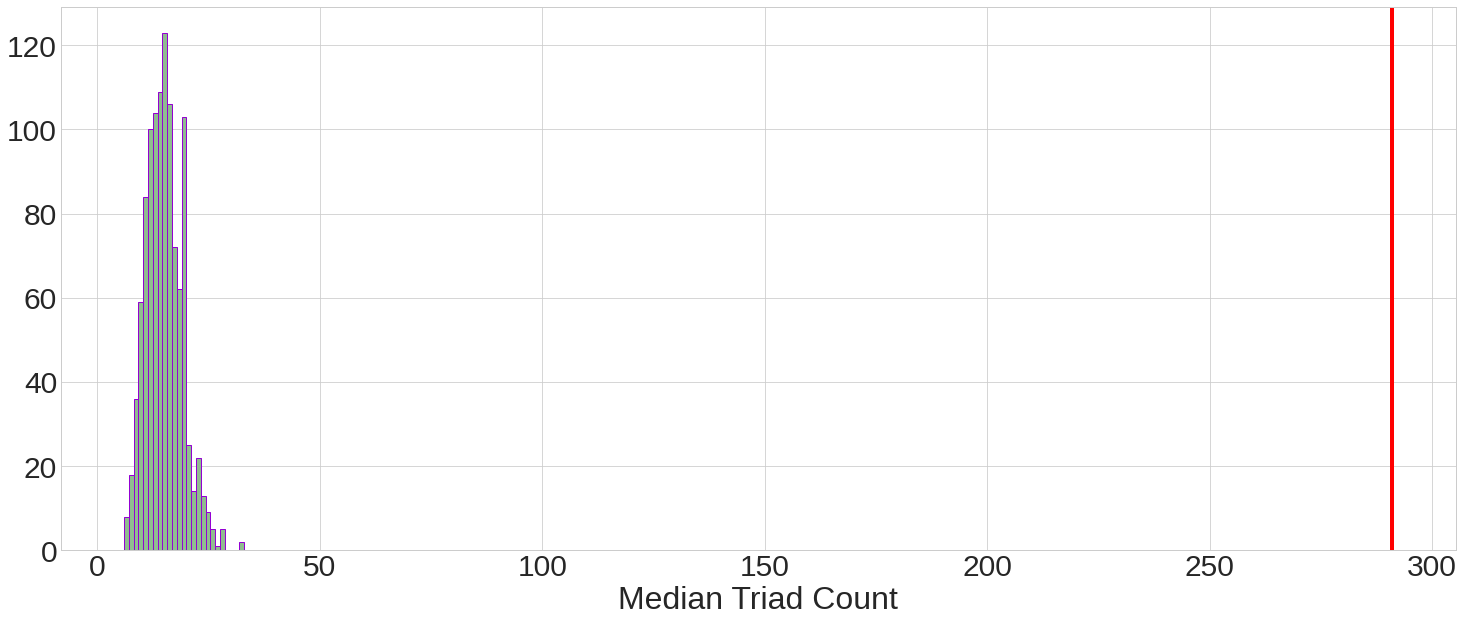

In [180]:
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(25,10))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Median Triad Count", fontsize=32)
#kde = gaussian_kde(real["triad_count"])
#xx = np.linspace(0, 16000, 10_000)

plt.hist(distribution, color = "darkseagreen", ec="darkviolet", bins=25)
plt.axvline(x = statistic, ymin=0, ymax=10, linewidth=4, color="red")
#plt.plot(xx, kde(xx))